In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from recommender import User, Movie, Recommender
import matplotlib.pylab as plt
import math
import numpy as np
from plot import plot_statistics, plot_user_movie_ratings, plot_ratings_distribution, plot_ratings_distribution_kde, plot_movie_embeddings
import optuna

## Dataset Summary

In [2]:
rec = Recommender(k=20)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv")


Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|██████████| 59047/59047 [00:20<00:00, 2943.58it/s] 


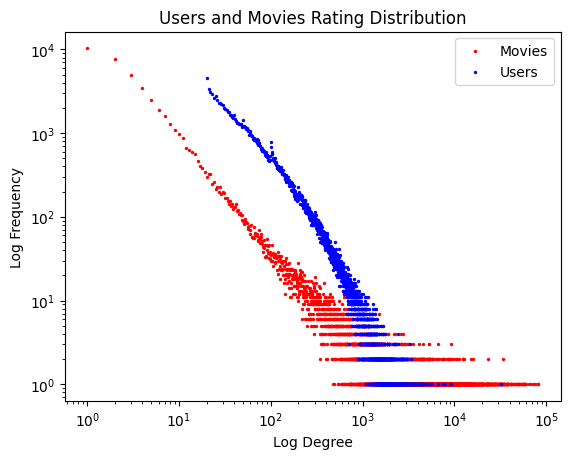

In [4]:
plot_user_movie_ratings(rec)

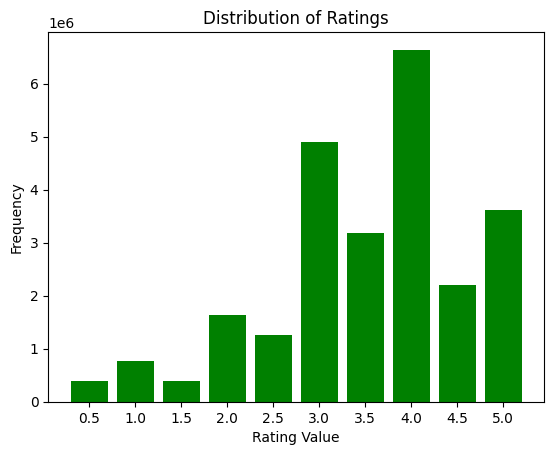

In [5]:
plot_ratings_distribution(rec)

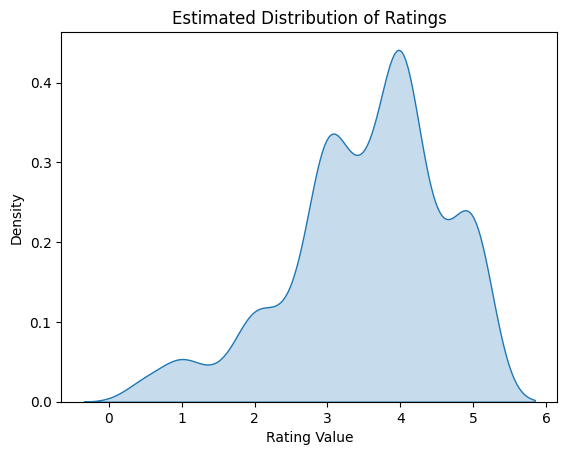

In [6]:
plot_ratings_distribution_kde(rec)

## Hyperparameter Tuning
### Initial test run to determine appropriate number of iterations

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|██████████| 59047/59047 [00:26<00:00, 2198.98it/s] 


162541
59047


100%|██████████| 25/25 [15:37<00:00, 37.52s/it]


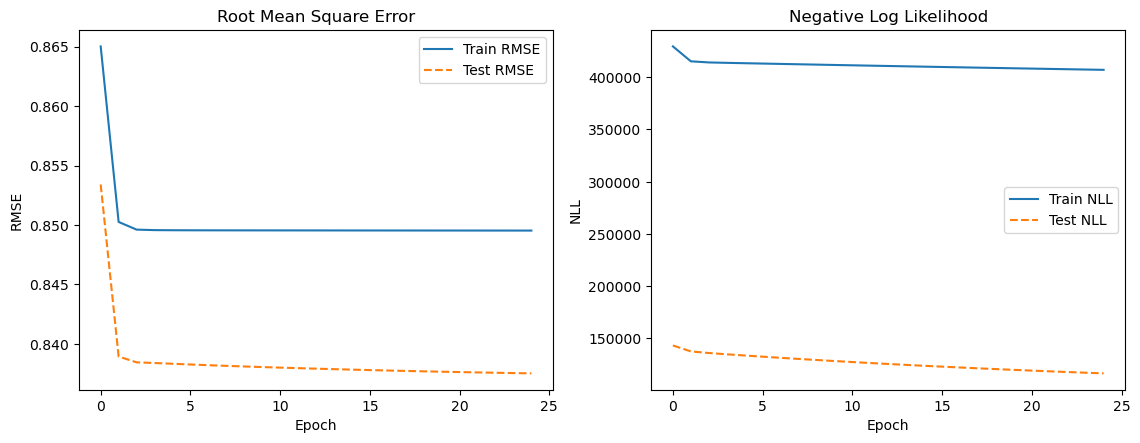

In [2]:
rec = Recommender(k = 20)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv", train_test_split=True)
print(len(rec.users))
print(len(rec.movies))

statistics_biases = rec.fit_biases_only(max_iter=25)
plot_statistics(statistics_biases, biases_only=True, train_test_split=True, save_suffix="init_biases_only")

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59047/59047 [00:20<00:00, 2935.18it/s]


Initialized variables and statistics: 0.18247270584106445s
Ran initial update to user and item biases: 54.3139374256134s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [35:23<00:00, 84.95s/it]


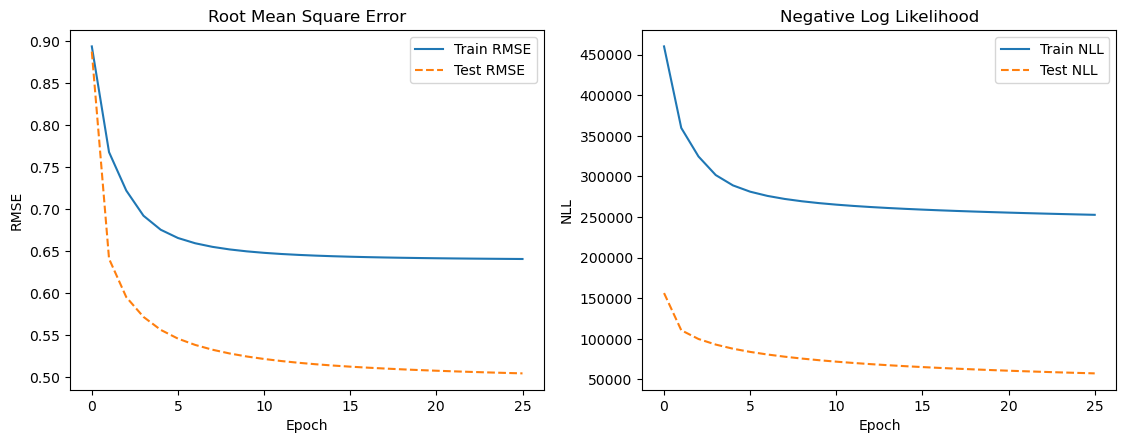

In [2]:
rec = Recommender(k = 20)
rec.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv", train_test_split=True)
statistics_embed = rec.fit(max_iter=25)
plot_statistics(statistics_embed, biases_only=False, train_test_split=True, save_suffix="init_embed")

In [5]:
print(statistics_embed["RMSEs"][0:15])


[0.8934656954524216, 0.7675416307045518, 0.7218288210280699, 0.6918068465960998, 0.6751467265909733, 0.6653165020247499, 0.6590546283283854, 0.6547781685795064, 0.6516992262065473, 0.6494033736542038, 0.6476475786959868, 0.6462779475263323, 0.6451920837175555, 0.6443187904456589, 0.6436070251039068]


### Determining the Best Value of k 

In [6]:
# Initialize the recommender system
k_values = [2, 5, 10, 20]
max_iter_embed = 10
max_iter_biases = 10

all_stats_biases = []
all_stats_embed = []
for k in k_values:
    rec.set_k(k)
    statistics_biases = rec.fit_biases_only(max_iter=max_iter_biases)
    statistics_embed = rec.fit(max_iter=max_iter_embed)
    all_stats_biases.append(statistics_biases)
    all_stats_embed.append(statistics_embed)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:11<00:00, 31.18s/it]


Initialized variables and statistics: 0.019494295120239258s
Ran initial update to user and item biases: 51.97130799293518s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:58<00:00, 35.84s/it]


Initialized variables and statistics: 0.07433319091796875s
Ran initial update to user and item biases: 58.90069770812988s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:39<00:00, 33.92s/it]


Initialized variables and statistics: 0.1052546501159668s
Ran initial update to user and item biases: 56.64716911315918s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [06:16<00:00, 37.70s/it]


Initialized variables and statistics: 0.2779216766357422s
Ran initial update to user and item biases: 64.70907235145569s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [15:33<00:00, 93.37s/it]


TypeError: 'list' object cannot be interpreted as an integer

In [8]:
for i in range(len(k_values)):
    print(f"RMSE_train_{k_values[i]}(biases): {all_stats_biases[i]["RMSEs"][-1]}")
    print(f"RMSE_train_{k_values[i]}(embed): {all_stats_embed[i]["RMSEs"][-1]}")
    print(f"RMSE_test_{k_values[i]}(biases): {all_stats_biases[i]["RMSEs_test"][-1]}")
    print(f"RMSE_test_{k_values[i]}(embed): {all_stats_embed[i]["RMSEs_test"][-1]}")

RMSE_train_2(biases): 0.849596168936541
RMSE_train_2(embed): 0.7911140422320483
RMSE_test_2(biases): 0.8379703873659242
RMSE_test_2(embed): 0.7715983447343903
RMSE_train_5(biases): 0.849596168936541
RMSE_train_5(embed): 0.7482055667284342
RMSE_test_5(biases): 0.8379703873659242
RMSE_test_5(embed): 0.7070600907778516
RMSE_train_10(biases): 0.849596168936541
RMSE_train_10(embed): 0.7038609580590747
RMSE_test_10(biases): 0.8379703873659242
RMSE_test_10(embed): 0.6287283555570669
RMSE_train_20(biases): 0.849596168936541
RMSE_train_20(embed): 0.6477468575809827
RMSE_test_20(biases): 0.8379703873659242
RMSE_test_20(embed): 0.5219909065679675


### Finding Good Values for $\lambda$, $\gamma$ and $\tau$

In [9]:
#setting k to best value of k
rec.set_k(20)

def objective(trial):
    # Suggest values for the gamma, lam, tau hyperparameters
    gamma = trial.suggest_float("gamma", 0.01, 0.1)
    lam = trial.suggest_float("lam", 0.01, 0.1)
    tau = trial.suggest_float("tau", 0.01, 0.1)

    # Set model parameters
    rec.set_params(gamma=gamma, lam=lam, tau=tau)

    # Fit model and get statistics
    statistics = rec.fit(max_iter=10)
    final_RMSE = statistics["RMSEs_test"][-1]

    #Optimize for best test RMSE
    return final_RMSE

# Create a study object and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best parameters:", study.best_params)
print("Best value:", study.best_value)

[I 2024-05-16 22:49:09,221] A new study created in memory with name: no-name-7aa17ac4-b712-4105-9226-7aac4ab4af81


Initialized variables and statistics: 0.19146037101745605s
Ran initial update to user and item biases: 60.66193914413452s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:46<00:00, 88.66s/it]
[I 2024-05-16 23:04:56,828] Trial 0 finished with value: 0.5289747485195515 and parameters: {'gamma': 0.08711678493190213, 'lam': 0.07480738296989475, 'tau': 0.01995108586169632}. Best is trial 0 with value: 0.5289747485195515.


Initialized variables and statistics: 0.18418359756469727s
Ran initial update to user and item biases: 57.62965416908264s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:37<00:00, 87.76s/it]
[I 2024-05-16 23:20:32,278] Trial 1 finished with value: 0.5377834915660905 and parameters: {'gamma': 0.0721422159280708, 'lam': 0.06100119067461884, 'tau': 0.09367134855958195}. Best is trial 0 with value: 0.5289747485195515.


Initialized variables and statistics: 0.18570160865783691s
Ran initial update to user and item biases: 57.37665104866028s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:45<00:00, 88.56s/it]
[I 2024-05-16 23:36:15,469] Trial 2 finished with value: 0.535684574689136 and parameters: {'gamma': 0.030609716073452767, 'lam': 0.04271995461898123, 'tau': 0.09365676820717014}. Best is trial 0 with value: 0.5289747485195515.


Initialized variables and statistics: 0.19768834114074707s
Ran initial update to user and item biases: 57.465564012527466s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:44<00:00, 88.46s/it]
[I 2024-05-16 23:51:57,774] Trial 3 finished with value: 0.5220816940669809 and parameters: {'gamma': 0.021402324717005202, 'lam': 0.055137289476814684, 'tau': 0.05899481108667833}. Best is trial 3 with value: 0.5220816940669809.


Initialized variables and statistics: 0.18504834175109863s
Ran initial update to user and item biases: 57.4832501411438s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:45<00:00, 88.53s/it]
[I 2024-05-17 00:07:40,754] Trial 4 finished with value: 0.5177924528898364 and parameters: {'gamma': 0.010354093588329998, 'lam': 0.03746585133522321, 'tau': 0.029751964001800496}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.1859598159790039s
Ran initial update to user and item biases: 58.16684937477112s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.37s/it]
[I 2024-05-17 00:23:22,824] Trial 5 finished with value: 0.5229070728283358 and parameters: {'gamma': 0.023995717476391808, 'lam': 0.03680353049718574, 'tau': 0.0335206555691945}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18802785873413086s
Ran initial update to user and item biases: 57.47920250892639s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:42<00:00, 88.27s/it]
[I 2024-05-17 00:39:03,235] Trial 6 finished with value: 0.5327243632072721 and parameters: {'gamma': 0.08018744072187196, 'lam': 0.06294381026745008, 'tau': 0.07058607717948308}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18452978134155273s
Ran initial update to user and item biases: 57.44170141220093s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:45<00:00, 88.53s/it]
[I 2024-05-17 00:54:46,118] Trial 7 finished with value: 0.5222711556856575 and parameters: {'gamma': 0.06086947476446724, 'lam': 0.07773835165316098, 'tau': 0.014288751036514164}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18520450592041016s
Ran initial update to user and item biases: 57.37327456474304s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.31s/it]
[I 2024-05-17 01:10:26,761] Trial 8 finished with value: 0.5197671983011258 and parameters: {'gamma': 0.036169867879024355, 'lam': 0.09270703886154688, 'tau': 0.0774454706912331}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.1859896183013916s
Ran initial update to user and item biases: 57.56201887130737s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:45<00:00, 88.55s/it]
[I 2024-05-17 01:26:10,031] Trial 9 finished with value: 0.5431521001051501 and parameters: {'gamma': 0.05453963041612689, 'lam': 0.04464295689806489, 'tau': 0.094713143651528}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18606114387512207s
Ran initial update to user and item biases: 57.700032472610474s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:39<00:00, 87.99s/it]
[I 2024-05-17 01:41:47,813] Trial 10 finished with value: 0.5445098181340183 and parameters: {'gamma': 0.010287755589198248, 'lam': 0.013769666274399902, 'tau': 0.03969971566203828}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18352532386779785s
Ran initial update to user and item biases: 57.46819257736206s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:40<00:00, 88.06s/it]
[I 2024-05-17 01:57:26,037] Trial 11 finished with value: 0.5188777244737358 and parameters: {'gamma': 0.04335561343594096, 'lam': 0.09956082322209622, 'tau': 0.07273807016588787}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.18204021453857422s
Ran initial update to user and item biases: 56.931053161621094s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:41<00:00, 88.19s/it]
[I 2024-05-17 02:13:05,051] Trial 12 finished with value: 0.5485583011489471 and parameters: {'gamma': 0.047334926051754024, 'lam': 0.02360140051287972, 'tau': 0.047659620722160394}. Best is trial 4 with value: 0.5177924528898364.


Initialized variables and statistics: 0.1838226318359375s
Ran initial update to user and item biases: 57.08587431907654s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.36s/it]
[I 2024-05-17 02:28:45,957] Trial 13 finished with value: 0.5165054345405997 and parameters: {'gamma': 0.010693407327796431, 'lam': 0.09949154192081544, 'tau': 0.06290639739193268}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.18814349174499512s
Ran initial update to user and item biases: 58.15996956825256s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:41<00:00, 88.15s/it]
[I 2024-05-17 02:44:25,772] Trial 14 finished with value: 0.5228620686643453 and parameters: {'gamma': 0.01335945618504503, 'lam': 0.030829755714862128, 'tau': 0.028811843866703834}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.18732285499572754s
Ran initial update to user and item biases: 57.52076959609985s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.34s/it]
[I 2024-05-17 03:00:06,848] Trial 15 finished with value: 0.5292740358015063 and parameters: {'gamma': 0.09666293009256591, 'lam': 0.08107413794587828, 'tau': 0.05652664636588739}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.18326902389526367s
Ran initial update to user and item biases: 57.63176608085632s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:41<00:00, 88.12s/it]
[I 2024-05-17 03:15:45,893] Trial 16 finished with value: 0.5727587295516672 and parameters: {'gamma': 0.01995812560534494, 'lam': 0.010135562923172484, 'tau': 0.04629959377964639}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.18288016319274902s
Ran initial update to user and item biases: 58.02549362182617s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:44<00:00, 88.41s/it]
[I 2024-05-17 03:31:28,164] Trial 17 finished with value: 0.5294667723942407 and parameters: {'gamma': 0.033427304349641584, 'lam': 0.04803552930902592, 'tau': 0.06477495872655444}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.2503511905670166s
Ran initial update to user and item biases: 58.06774044036865s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.33s/it]
[I 2024-05-17 03:47:09,749] Trial 18 finished with value: 0.5229506937106105 and parameters: {'gamma': 0.014391613170517119, 'lam': 0.026451603256869873, 'tau': 0.02517086825328058}. Best is trial 13 with value: 0.5165054345405997.


Initialized variables and statistics: 0.17990922927856445s
Ran initial update to user and item biases: 57.5508177280426s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [14:43<00:00, 88.34s/it]
[I 2024-05-17 04:02:50,884] Trial 19 finished with value: 0.5277286733804332 and parameters: {'gamma': 0.06629035879624645, 'lam': 0.06746774266315335, 'tau': 0.011844677486654173}. Best is trial 13 with value: 0.5165054345405997.


Best parameters: {'gamma': 0.010693407327796431, 'lam': 0.09949154192081544, 'tau': 0.06290639739193268}
Best value: 0.5165054345405997


In [10]:
#setting k to best value of k
rec.set_k(20)

def objective(trial):
    # Suggest values for the gamma, lam, tau hyperparameters
    gamma = trial.suggest_float("gamma", 0.01, 0.1)
    lam = trial.suggest_float("lam", 0.01, 0.1)
    tau = trial.suggest_float("tau", 0.01, 0.1)

    # Set model parameters
    rec.set_params(gamma=gamma, lam=lam, tau=tau)

    # Fit model and get statistics
    statistics = rec.fit_biases_only(max_iter=10)
    final_RMSE = statistics["RMSEs_test"][-1]

    #Optimize for best test RMSE
    return final_RMSE

# Create a study object and optimize the objective function
study2 = optuna.create_study(direction="minimize")
study2.optimize(objective, n_trials=20)

print("Best parameters:", study2.best_params)
print("Best value:", study2.best_value)

[I 2024-05-17 04:02:51,242] A new study created in memory with name: no-name-2343b470-de99-4aa2-bb6e-ee56b936c8ad
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:36<00:00, 33.69s/it]
[I 2024-05-17 04:08:28,116] Trial 0 finished with value: 0.847231565049177 and parameters: {'gamma': 0.05987033475694267, 'lam': 0.04991315505844191, 'tau': 0.06432215262298994}. Best is trial 0 with value: 0.847231565049177.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [05:43<00:00, 34.37s/it]
[I 2024-05-17 04:14:11,845] Trial 1 finished with value: 0.8665735189542315 and parameters: {'gamma': 0.0921007277873059, 'lam': 0.02755998979050698, 'tau': 0.062334951373147755}. Best is trial 0 with value: 0.847231565049177.
100%|██████

Best parameters: {'gamma': 0.012785473480872469, 'lam': 0.09145133312089707, 'tau': 0.06498594156961879}
Best value: 0.8358938353481551


In [19]:
#Embeddings
print("Embedding Trials-------------")
for trial in study.get_trials():
    RMSE_test = trial.value
    gamma = trial.params["gamma"]
    lam = trial.params["lam"]
    tau = trial.params["tau"]
    print(f"Trial {trial.number}: RMSE - {round(RMSE_test, 4)}, gamma - {round(gamma, 4)}, lam - {round(lam, 4)}, tau - {round(tau, 4)}")

#Embeddings
print("Bias Only Trials-------------")
for trial in study2.get_trials():
    RMSE_test = trial.value
    gamma = trial.params["gamma"]
    lam = trial.params["lam"]
    tau = trial.params["tau"]
    print(f"Trial {trial.number}: RMSE - {round(RMSE_test, 4)}, gamma - {round(gamma, 4)}, lam - {round(lam, 4)}, tau - {round(tau, 4)}")

Embedding Trials-------------
Trial 0: RMSE - 0.529, gamma - 0.0871, lam - 0.0748, tau - 0.02
Trial 1: RMSE - 0.5378, gamma - 0.0721, lam - 0.061, tau - 0.0937
Trial 2: RMSE - 0.5357, gamma - 0.0306, lam - 0.0427, tau - 0.0937
Trial 3: RMSE - 0.5221, gamma - 0.0214, lam - 0.0551, tau - 0.059
Trial 4: RMSE - 0.5178, gamma - 0.0104, lam - 0.0375, tau - 0.0298
Trial 5: RMSE - 0.5229, gamma - 0.024, lam - 0.0368, tau - 0.0335
Trial 6: RMSE - 0.5327, gamma - 0.0802, lam - 0.0629, tau - 0.0706
Trial 7: RMSE - 0.5223, gamma - 0.0609, lam - 0.0777, tau - 0.0143
Trial 8: RMSE - 0.5198, gamma - 0.0362, lam - 0.0927, tau - 0.0774
Trial 9: RMSE - 0.5432, gamma - 0.0545, lam - 0.0446, tau - 0.0947
Trial 10: RMSE - 0.5445, gamma - 0.0103, lam - 0.0138, tau - 0.0397
Trial 11: RMSE - 0.5189, gamma - 0.0434, lam - 0.0996, tau - 0.0727
Trial 12: RMSE - 0.5486, gamma - 0.0473, lam - 0.0236, tau - 0.0477
Trial 13: RMSE - 0.5165, gamma - 0.0107, lam - 0.0995, tau - 0.0629
Trial 14: RMSE - 0.5229, gamma - 0

In [25]:
print("Best params embeddings")
print(study.best_params)
print(study.best_value)
print(study.best_trial.number)
best_params_embed = study.best_params
gamma, lam, tau = best_params_embed["gamma"], best_params_embed["lam"], best_params_embed["tau"]

print("Best params biases only")
print(study2.best_params)
print(study2.best_value)
print(study2.best_trial.number)
best_params_bias = study2.best_params
gamma_bias, lam_bias, tau_bias = best_params_bias["gamma"], best_params_bias["lam"], best_params_bias["tau"]

Best params embeddings
{'gamma': 0.010693407327796431, 'lam': 0.09949154192081544, 'tau': 0.06290639739193268}
0.5165054345405997
13
Best params biases only
{'gamma': 0.012785473480872469, 'lam': 0.09145133312089707, 'tau': 0.06498594156961879}
0.8358938353481551
6


## Results: Embeddings and Biases Model Best Parameters

Initialized variables and statistics: 0.19878935813903809s
Ran initial update to user and item biases: 53.740910053253174s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [27:55<00:00, 83.76s/it]


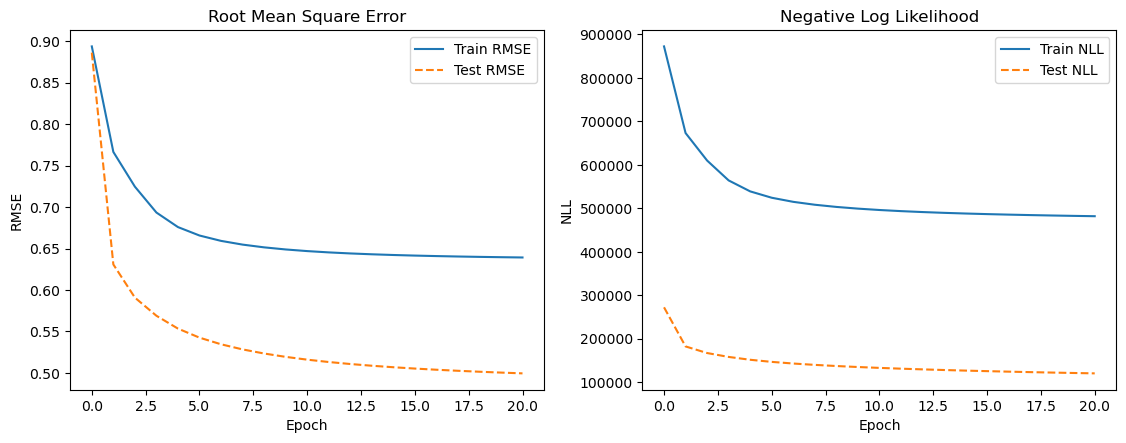

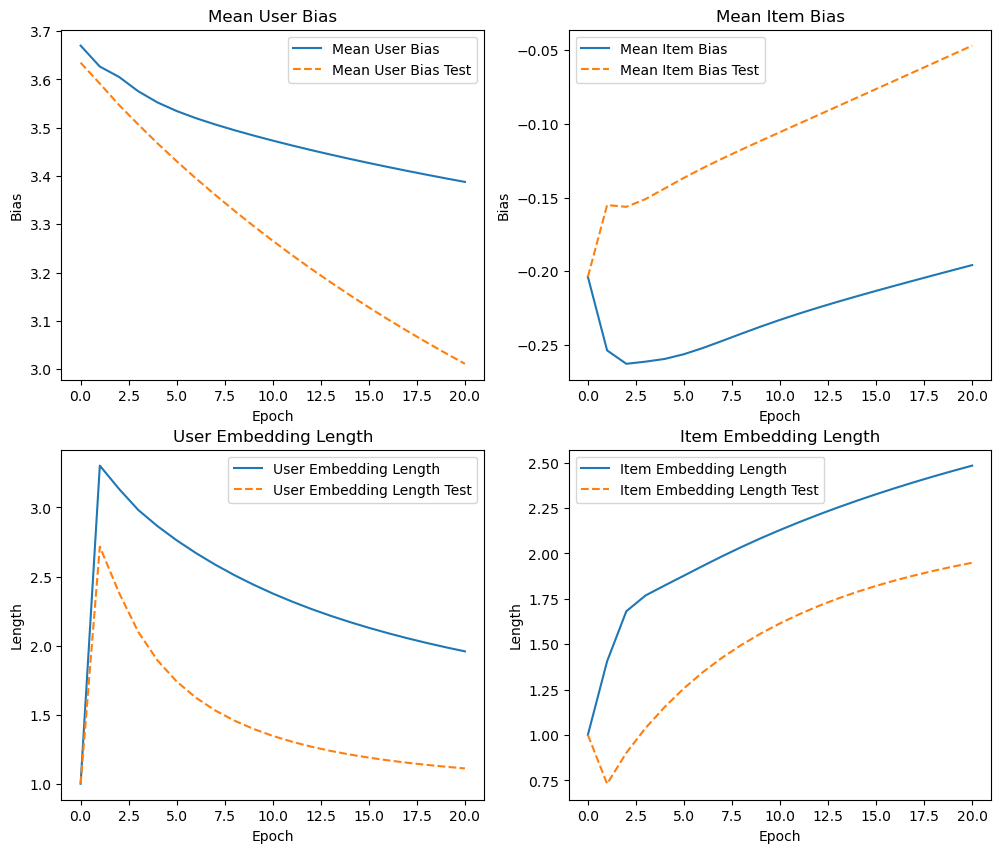

In [29]:
rec.set_k(20)
rec.set_params(gamma=gamma, lam=lam, tau=tau)
statistics_best = rec.fit(max_iter=20, extra_stats=True)
plot_statistics(statistics_best, extra_stats=True, train_test_split=True, save_suffix="embed_best_params")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [11:00<00:00, 33.00s/it]


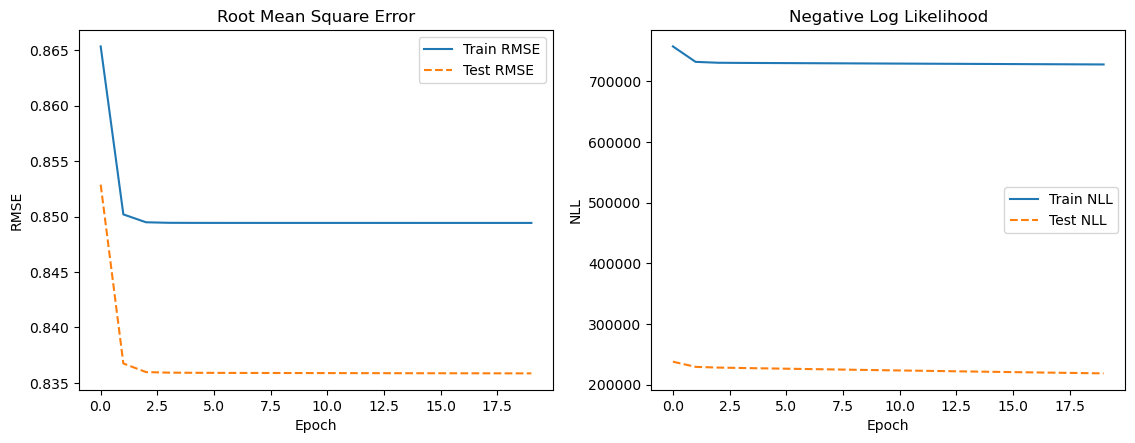

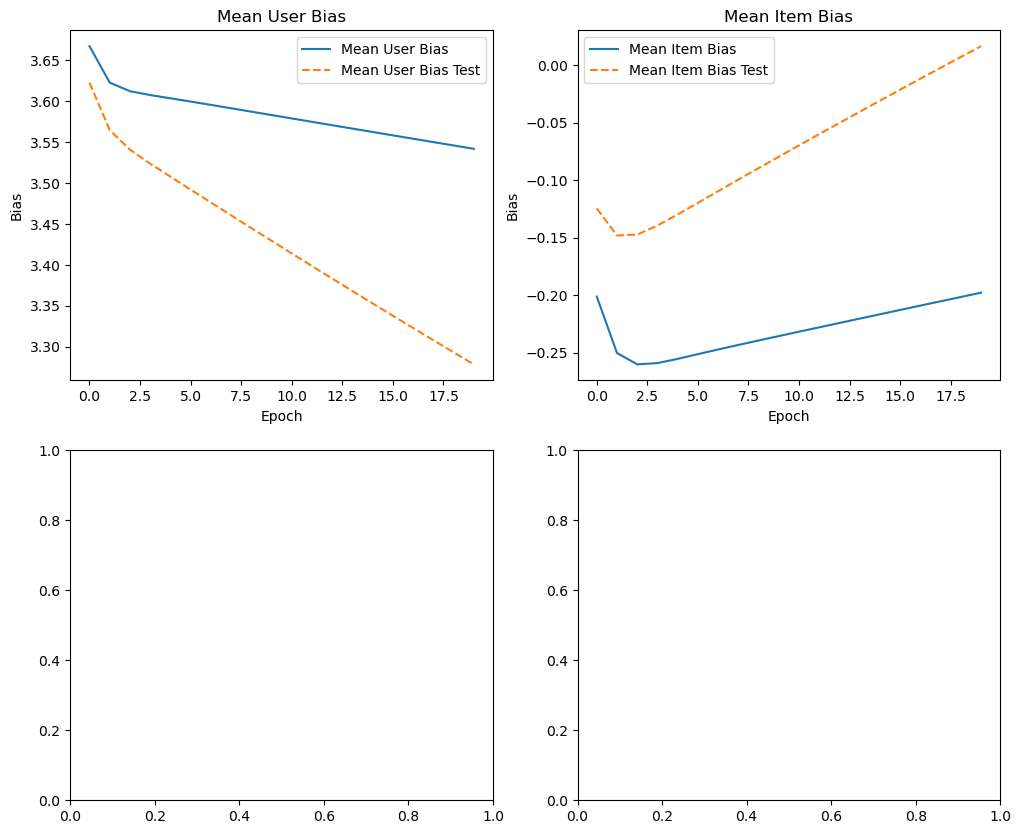

In [30]:
rec.set_k(20)
rec.set_params(gamma=gamma_bias, lam=lam_bias, tau=tau_bias)
statistics_best = rec.fit_biases_only(max_iter=20, extra_stats=True)
plot_statistics(statistics_best, extra_stats=True, biases_only=True, train_test_split=True, save_suffix="bias_best_params")

## Dummy Users

In [3]:
#fit the recommender on the full training set
gamma = 0.010693407327796431
lam = 0.09949154192081544
tau = 0.06290639739193268
rec_full = Recommender(k=20, gamma=gamma, lam=lam, tau=tau)
rec_full.initialize_from_csv("ml-25m/movies.csv", "ml-25m/ratings.csv")

Initialized
Parsed ml-25m/ratings.csv
Parsed ml-25m/movies.csv


Reformatting movie ratings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59047/59047 [00:23<00:00, 2553.90it/s]


In [33]:
ratings = [
    ("Lord of the Rings: The Fellowship of the Ring, The (2001)", 5.0),
    ("Minions (2015)", 5.0),
    ("Fight Club (1999)", 5.0),
    ("Twilight (2008)", 5.0),
    ("Avengers, The (2012)", 5.0),
    ("Conjuring, The (2013)", 5.0),
    ("Notebook, The (2004)", 5.0)
]

dummy_uids = []
for rating in ratings:
    uid = rec_full.insert_dummy_user([rating])
    dummy_uids.append(uid)

In [44]:
rec_full.set_params(gamma=gamma_bias, lam=lam_bias, tau=tau_bias)
statistics_full_biases = rec_full.fit_biases_only(max_iter=20)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [11:02<00:00, 33.15s/it]


In [47]:
for uid in dummy_uids:
    ratings, titles = rec_full.predict_movies_for_user(uid, biases_only=True)
    print(uid)
    print(ratings[0:10])
    print(titles[0:10])

162542
[6.80510807 6.79678016 6.70358748 6.70358748 6.70358748 6.37928118
 6.28555414 6.18650982 6.06687211 6.02802006]
['Inside Out (1991)' 'Emmanuelle: Queen of Sados (1980)'
 "Anybody's Son Will Do" 'The Viking (1931)'
 "Evening's Civil Twilight in Empires of Tin (2008)" 'The Thorn (1971)'
 'Screen Play (1992)' 'The Good Mother (2013)' 'Truth and Justice (2019)'
 'Amori che non sanno stare al mondo (2017)']
162543
[7.69699961 7.6886717  7.59547902 7.59547902 7.59547902 7.27117271
 7.17744567 7.07840135 6.95876364 6.91991159]
['Inside Out (1991)' 'Emmanuelle: Queen of Sados (1980)'
 "Anybody's Son Will Do" 'The Viking (1931)'
 "Evening's Civil Twilight in Empires of Tin (2008)" 'The Thorn (1971)'
 'Screen Play (1992)' 'The Good Mother (2013)' 'Truth and Justice (2019)'
 'Amori che non sanno stare al mondo (2017)']
162544
[6.68173865 6.67341074 6.58021806 6.58021806 6.58021806 6.25591175
 6.16218472 6.06314039 5.94350268 5.90465063]
['Inside Out (1991)' 'Emmanuelle: Queen of Sados (19

In [5]:
rec_full.set_params(gamma=gamma, lam=lam, tau=tau)
statistics_full_embed = rec_full.fit(max_iter=20)

Initialized variables and statistics: 0.09588813781738281s
Ran initial update to user and item biases: 53.11076474189758s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [25:15<00:00, 75.79s/it]


In [40]:
for uid in dummy_uids:
    ratings, titles = rec_full.predict_movies_for_user(uid)
    print(uid)
    print(ratings[0:10])
    print(titles[0:10])

162542
[4.98558963 4.9161924  4.9017633  3.88762312 3.66111965 3.57061729
 3.49897725 3.40443493 3.35677773 3.29745927]
['Lord of the Rings: The Return of the King, The (2003)'
 'Lord of the Rings: The Fellowship of the Ring, The (2001)'
 'Lord of the Rings: The Two Towers, The (2002)'
 'Cosmos: A Spacetime Odissey' 'Hobbit: An Unexpected Journey, The (2012)'
 'Hobbit: The Desolation of Smaug, The (2013)' 'Screen Play (1992)'
 'Sherlock: The Lying Detective (2017)'
 'The Hobbit: The Battle of the Five Armies (2014)'
 'Les Luthiers: El Grosso Concerto (2001)']
162543
[4.87354646 4.72387263 4.56697089 4.55024261 4.49846204 4.26617705
 4.2573773  4.23909366 4.12758333 4.12455708]
['Minions (2015)'
 'What the #$*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004)'
 'Shrek the Halls (2007)' 'George Carlin: Back in Town (1996)'
 'Despicable Me 2 (2013)'
 'Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)'
 'Ice Age 4: Continental Drift (2012)'
 'Jim Jefferies: Fully Functio

## Most Polarizing Movies

In [6]:
lengths, titles = rec_full.predict_most_polarizing()

print(lengths[0:10])
print(titles[0:10])

[2.88538655 3.10537419 3.42407963 2.4742652  2.18129116 3.13108577
 2.08359342 2.06453659 2.39134984 1.82025449]
['Room, The (2003)' 'Birdemic: Shock and Terror (2010)'
 'Plan 9 from Outer Space (1959)' 'Louis C.K.: Chewed Up (2008)'
 'Expelled: No Intelligence Allowed (2008)' 'Louis C.K.: Hilarious (2010)'
 'Louis C.K.: Shameless (2007)' 'Grateful Dead (1995)' 'Saw VI (2009)'
 'What the #$*! Do We Know!? (a.k.a. What the Bleep Do We Know!?) (2004)']


## Least Polarizing Movies

In [7]:
# Reverse the order to get the least polarizing movies
least_polarizing_lengths = lengths[::-1]
least_polarizing_titles = titles[::-1]

# Print the least polarizing movies
print(least_polarizing_lengths[0:10])
print(least_polarizing_titles[0:10])

[4.04661437e-05 4.08910686e-05 6.05916419e-02 2.09614009e-01
 2.09615219e-01 2.09613861e-01 8.96875786e-02 8.97058732e-02
 8.97045995e-02 8.97144179e-02]
['Il pesce innamorato (1999)' 'The Graduates (1995)'
 'Amateurs in Space (2016)' 'Midnight Sun (2014)' 'All Stars (2013)'
 'The Forest (2018)' 'Reed Paradise (1989)' 'Startup (2014)'
 'The End (2004)' 'Lynching Charlie Lynch (2012)']


### 2D Embeddings Visualization

In [6]:
rec_full.set_k(2)
rec_full.set_params(gamma=gamma, lam=lam, tau=tau)
rec_full.fit(max_iter=20)

Initialized variables and statistics: 0.011090278625488281s
Ran initial update to user and item biases: 51.75870442390442s


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [20:44<00:00, 62.22s/it]


{'neg_log_liks': [1627501.7251126256,
  958284.4742059617,
  920132.4647828693,
  883632.2627131979,
  868178.140114882,
  861327.5197414473,
  857677.8824621883,
  855368.2379366675,
  853706.7644358277,
  852403.7271789468,
  851342.3367462672,
  850486.0192037976,
  849819.7601053525,
  849309.3213762237,
  848909.9752004456,
  848586.3288666856,
  848315.0236242831,
  848081.0203980993,
  847874.4795556368,
  847688.7532340728,
  847519.1941743614],
 'RMSEs': [1.1162950886220047,
  0.8450321629810602,
  0.8265061748835975,
  0.8086682577582741,
  0.8011086921377208,
  0.7977705810661823,
  0.7960165302606353,
  0.7949303303326904,
  0.7941695739524187,
  0.7935892023503324,
  0.7931295334692051,
  0.7927707900255417,
  0.7925045484230715,
  0.7923133306458855,
  0.7921747751462027,
  0.7920715494161245,
  0.7919923913827224,
  0.7919301206508956,
  0.7918800670954138,
  0.7918390875272254,
  0.7918049988700117]}

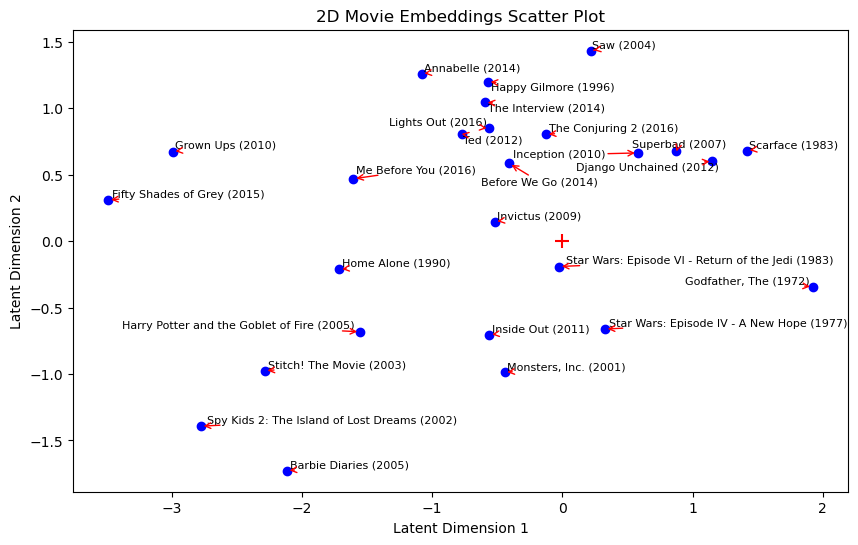

In [17]:
titles_for_visualization = [
"Star Wars: Episode IV - A New Hope (1977)",
"Star Wars: Episode VI - Return of the Jedi (1983)",
"Harry Potter and the Goblet of Fire (2005)",
"Invictus (2009)",
"Inception (2010)",
"Me Before You (2016)",
"Before We Go (2014)",
"Home Alone (1990)",
"Stitch! The Movie (2003)",
"Monsters, Inc. (2001)",
"Inside Out (2011)",
"Barbie Diaries (2005)",
"Spy Kids 2: The Island of Lost Dreams (2002)",
"Fifty Shades of Grey (2015)",
"The Conjuring 2 (2016)",
"Lights Out (2016)",
"Saw (2004)",
"Annabelle (2014)",
"Grown Ups (2010)",
"Happy Gilmore (1996)",
"Superbad (2007)",
"Ted (2012)",
"The Interview (2014)",
"Godfather, The (1972)",
"Django Unchained (2012)",
"Scarface (1983)"
]

embeddings = [rec_full.get_movie_embedding_by_title(movie_title) for movie_title in titles_for_visualization]
plot_movie_embeddings(titles_for_visualization, embeddings)